In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("matches.csv")

In [8]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Data Exploration and Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               636 non-null    int64         
 1   season           636 non-null    int64         
 2   city             629 non-null    object        
 3   date             636 non-null    datetime64[ns]
 4   team1            636 non-null    object        
 5   team2            636 non-null    object        
 6   toss_winner      636 non-null    object        
 7   toss_decision    636 non-null    object        
 8   result           636 non-null    object        
 9   dl_applied       636 non-null    int64         
 10  winner           633 non-null    object        
 11  win_by_runs      636 non-null    int64         
 12  win_by_wickets   636 non-null    int64         
 13  player_of_match  633 non-null    object        
 14  venue            636 non-null    object   

In [5]:
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [6]:
df['date']=pd.to_datetime(df.date)

In [9]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [17]:
df[df['city'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [91]:
# Since there are missing values venue Dubai, so we try to replace those cities as city names
df['city'].fillna('Dubai',inplace=True)

In [92]:
df[df['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,is_super_over_transformed,win_by_runs_transformed
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN,0.0,0.0
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN,0.0,0.0
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN,0.0,0.0


In [93]:
# Droping remaining null values
df.drop([300,545,570],inplace=True)

In [94]:
df.isna().sum()

id                             0
season                         0
city                           0
date                           0
team1                          0
team2                          0
toss_winner                    0
toss_decision                  0
result                         0
dl_applied                     0
winner                         0
win_by_runs                    0
win_by_wickets                 0
player_of_match                0
venue                          0
umpire1                        1
umpire2                        1
umpire3                      633
is_super_over_transformed      0
win_by_runs_transformed        0
dtype: int64

In [95]:
df[df['umpire1'].isna()]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,is_super_over_transformed,win_by_runs_transformed
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,0.0,2.772589


In [96]:
# Replacing rest of the null data
df['umpire1'].fillna('umpire',inplace=True)

In [97]:
df['umpire2'].fillna('umpire',inplace=True)

In [98]:
df['umpire3'].fillna('umpire',inplace=True)

In [99]:
df.isna().sum()

id                           0
season                       0
city                         0
date                         0
team1                        0
team2                        0
toss_winner                  0
toss_decision                0
result                       0
dl_applied                   0
winner                       0
win_by_runs                  0
win_by_wickets               0
player_of_match              0
venue                        0
umpire1                      0
umpire2                      0
umpire3                      0
is_super_over_transformed    0
win_by_runs_transformed      0
dtype: int64

# Loading Data2

In [3]:
df1=pd.read_csv("deliveries.csv")

In [4]:
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [44]:
df1.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [45]:
df1['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [86]:
df1.replace({'Rising Pune Supergiant':'Rising Pune Supergiants'},inplace=True)

In [87]:
df1['dismissal_kind'].fillna('NA',inplace=True)
df1['player_dismissed'].fillna('NA',inplace=True)
df1['fielder'].fillna('NA',inplace=True)

In [88]:
df1.isna().sum()

match_id                     0
inning                       0
batting_team                 0
bowling_team                 0
over                         0
ball                         0
batsman                      0
non_striker                  0
bowler                       0
is_super_over                0
wide_runs                    0
bye_runs                     0
legbye_runs                  0
noball_runs                  0
penalty_runs                 0
batsman_runs                 0
extra_runs                   0
total_runs                   0
player_dismissed             0
dismissal_kind               0
fielder                      0
is_super_over_transformed    0
wide_runs_transformed        0
dtype: int64

# Handling anomalies

In [5]:
import statistics

In [27]:
#Function to detect outliers on one-dimentional dataset:
def find_anomalies(df):
    #define a list to accumulate anomalies
    anomalies=[]
    
    #Set upper and lower limit to 3 standard deviation
    data_std=statistics.stdev(df)
    data_mean=statistics.mean(df)
    #3-standard deviation
    
    anomaly_cut_off=data_std*3
    
    lower_limit=data_mean-anomaly_cut_off
    upper_limit=data_mean+anomaly_cut_off
    
    #Generate outliers
    for outlier in df:
        if outlier>upper_limit or outlier<lower_limit:
            anomalies.append(outlier)
    return anomalies

In [28]:
list1=find_anomalies(df['win_by_runs'])

In [29]:
len(list1)

16

In [30]:
len(df)

636

In [31]:
df.win_by_runs.skew()

2.5220633095183893

<Axes: xlabel='win_by_runs', ylabel='Density'>

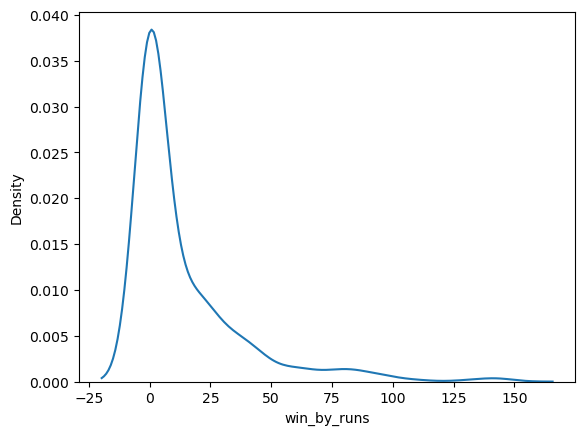

In [32]:
sns.kdeplot(df.win_by_runs)

In [33]:
df['win_by_runs_transformed']=np.log(df['win_by_runs']+1)

In [34]:
df.win_by_runs_transformed.skew()

0.5633155821491672

In [35]:
list2=find_anomalies(df.win_by_runs_transformed)

In [36]:
len(list2)

0

## Visualization

In [65]:
#Q1
# Aggregate total runs by over
total_runs_per_over=df1.groupby('over')['total_runs'].sum()


In [61]:
#Calculate the number of deliveries per over to get the average runs per over
deliveries_per_over = df1['over'].value_counts().sort_index()

In [62]:
#Calculate average runs per over
average_runs_per_over = total_runs_per_over / deliveries_per_over

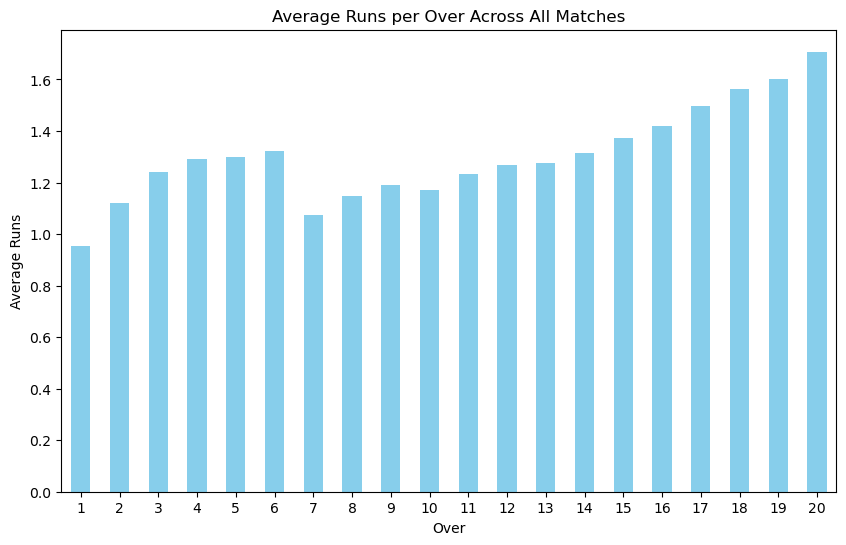

In [63]:
plt.figure(figsize=(10, 6))
average_runs_per_over.plot(kind='bar', color='skyblue')
plt.title('Average Runs per Over Across All Matches')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.xticks(rotation=0)
plt.show()

In [67]:
#Q2
#Identify boundary events (fours and sixes)
boundaries_df1 = df1[df1['batsman_runs'].isin([4, 6])]

In [68]:
#Aggregate boundary data by batting team and Calculate the number of fours and sixes hit by each team
fours = boundaries_df1[boundaries_df1['batsman_runs'] == 4].groupby('batting_team').size()
sixes = boundaries_df1[boundaries_df1['batsman_runs'] == 6].groupby('batting_team').size()

In [69]:
# Combine the boundary counts into a single DataFrame
boundary_counts = pd.DataFrame({'Fours': fours, 'Sixes': sixes}).fillna(0)

In [70]:
#Calculate total runs scored by each team
total_runs_per_team = df1.groupby('batting_team')['total_runs'].sum()

In [71]:
# Calculate runs from boundaries (4s and 6s) for each team
runs_from_boundaries = (fours * 4) + (sixes * 6)

In [72]:
#Calculate the percentage of runs from boundaries for each team
boundary_percentage = (runs_from_boundaries / total_runs_per_team) * 100

In [73]:
# Combine into a single DataFrame for analysis
boundary_analysis = pd.DataFrame({
    'Fours': fours,
    'Sixes': sixes,
    'Runs from Boundaries': runs_from_boundaries,
    'Total Runs': total_runs_per_team,
    'Boundary Percentage (%)': boundary_percentage
}).fillna(0)

In [74]:
boundary_analysis

,Fours,Sixes,Runs from Boundaries,Total Runs,Boundary Percentage (%)
batting_team,,,,,
Chennai Super Kings,1770,742,11532,20899,55.179674
Deccan Chargers,957,400,6228,11463,54.331327
Delhi Daredevils,1970,686,11996,21953,54.644012
Gujarat Lions,460,155,2770,4862,56.972439
Kings XI Punjab,2083,762,12904,23068,55.938963
Kochi Tuskers Kerala,170,53,998,1901,52.498685
Kolkata Knight Riders,1978,659,11866,21965,54.022308
Mumbai Indians,2145,876,13836,24521,56.425105
Pune Warriors,525,196,3276,6358,51.525637


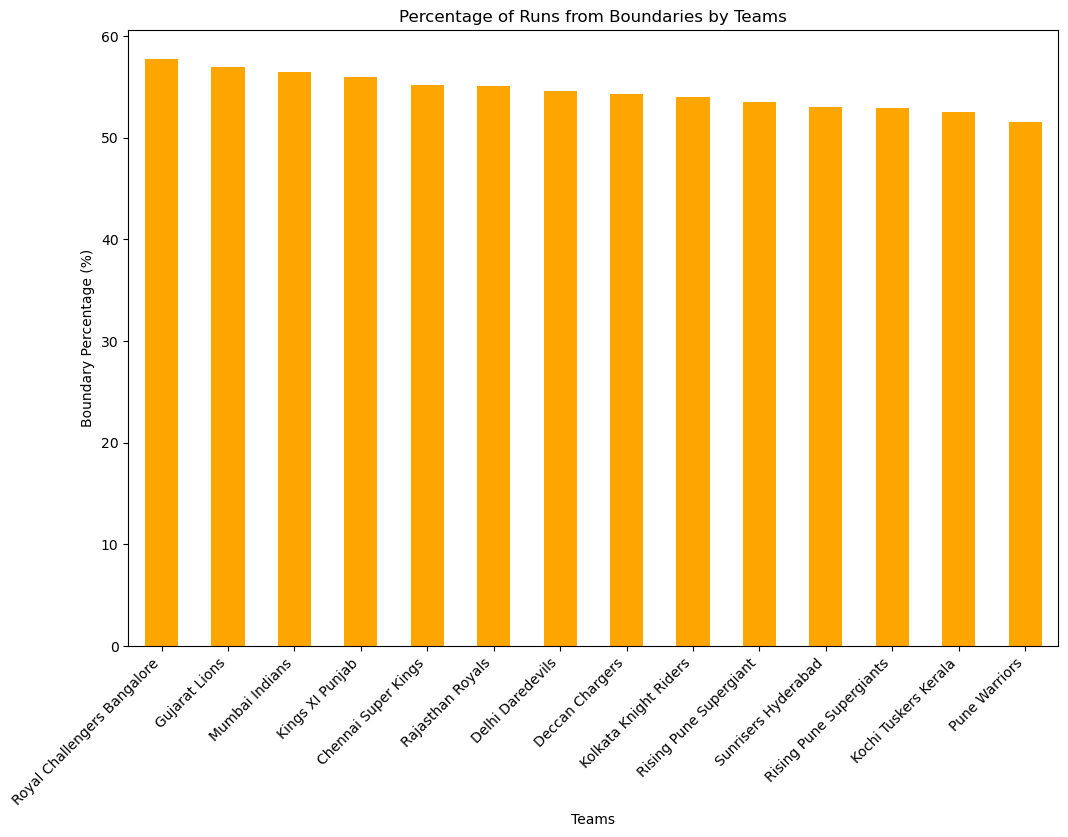

In [75]:
#visualization
plt.figure(figsize=(12, 8))
boundary_analysis['Boundary Percentage (%)'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Percentage of Runs from Boundaries by Teams')
plt.xlabel('Teams')
plt.ylabel('Boundary Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [76]:
#Q3
#Aggregate extra runs by type and bowling team
# Calculate the total number of wide, noball, bye, and legbye runs conceded by each team
wide_runs = df1.groupby('bowling_team')['wide_runs'].sum()
noball_runs = df1.groupby('bowling_team')['noball_runs'].sum()
bye_runs = df1.groupby('bowling_team')['bye_runs'].sum()
legbye_runs = df1.groupby('bowling_team')['legbye_runs'].sum()

In [78]:
#Calculate the total extra runs conceded by each team
total_extra_runs = df1.groupby('bowling_team')['extra_runs'].sum()

In [79]:
# Combine the extra run types into a single DataFrame
extra_runs_distribution = pd.DataFrame({
    'Wide Runs': wide_runs,
    'No-Ball Runs': noball_runs,
    'Bye Runs': bye_runs,
    'Leg-Bye Runs': legbye_runs,
    'Total Extra Runs': total_extra_runs
}).fillna(0)

In [80]:
#Calculate the percentage of each type of extra run
extra_runs_distribution['Wide %'] = (extra_runs_distribution['Wide Runs'] / extra_runs_distribution['Total Extra Runs']) * 100
extra_runs_distribution['No-Ball %'] = (extra_runs_distribution['No-Ball Runs'] / extra_runs_distribution['Total Extra Runs']) * 100
extra_runs_distribution['Bye %'] = (extra_runs_distribution['Bye Runs'] / extra_runs_distribution['Total Extra Runs']) * 100
extra_runs_distribution['Leg-Bye %'] = (extra_runs_distribution['Leg-Bye Runs'] / extra_runs_distribution['Total Extra Runs']) * 100

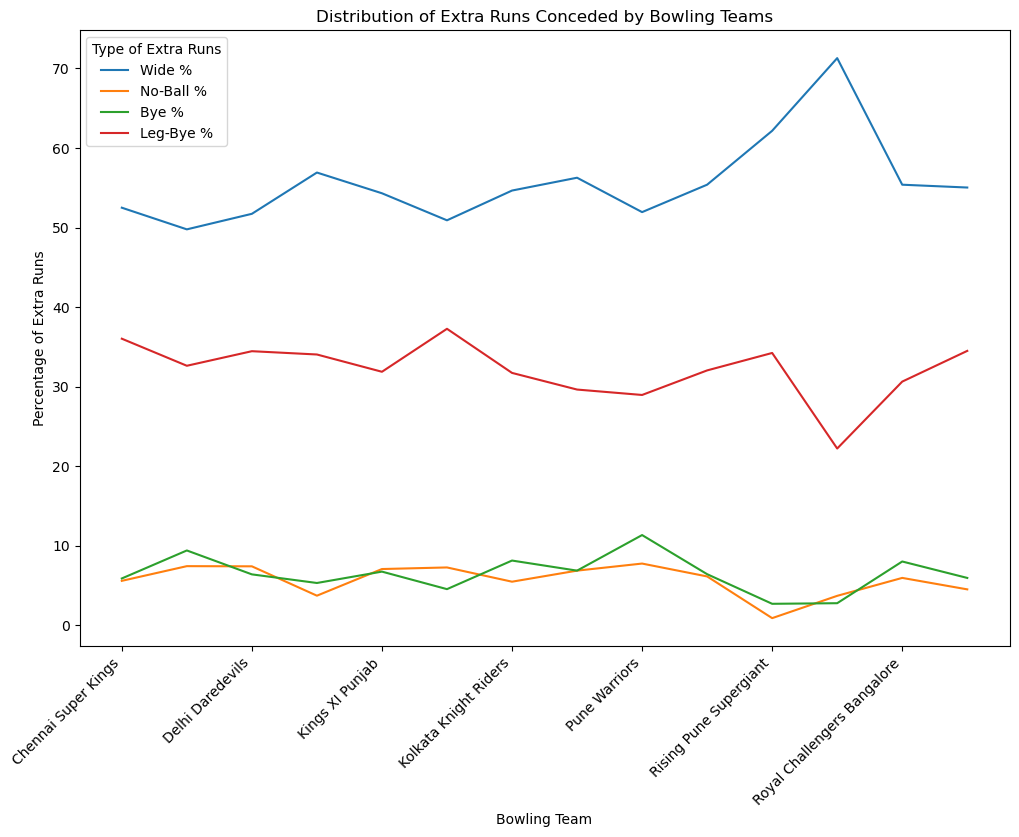

In [81]:
#Visualization
extra_runs_distribution[['Wide %', 'No-Ball %', 'Bye %', 'Leg-Bye %']].plot(kind='line', figsize=(12, 8))
plt.title('Distribution of Extra Runs Conceded by Bowling Teams')
plt.xlabel('Bowling Team')
plt.ylabel('Percentage of Extra Runs')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Type of Extra Runs")
plt.show()

In [180]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_super_over_transformed,wide_runs_transformed,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NA,NA,NA,0.0,0.000000,Powerplay
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NA,NA,NA,0.0,0.000000,Powerplay
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NA,NA,NA,0.0,0.000000,Powerplay
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NA,NA,NA,0.0,0.000000,Powerplay
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NA,NA,NA,0.0,1.098612,Powerplay


In [137]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,is_super_over_transformed,win_by_runs_transformed
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,umpire,0.0,3.583519
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,umpire,0.0,0.000000
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,umpire,0.0,0.000000
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,umpire,0.0,0.000000
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,umpire,umpire,umpire,0.0,2.772589


In [101]:
#Q4
#Define the phases of the innings
def assign_phase(over):
    if 1 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'

In [102]:
# Apply the function to create a new column 'phase'
df1['phase'] = df1['over'].apply(assign_phase)

In [104]:
#Calculate total runs and overs faced for each team in each phase
phase_data = df1.groupby(['batting_team', 'phase']).agg(
    total_runs=('total_runs', 'sum'),
    total_overs=('over', 'nunique')  # Using 'nunique' to get the number of overs in each phase
).reset_index()

In [105]:
# Calculate the run rate for each team in each phase
phase_data['run_rate'] = phase_data['total_runs'] / phase_data['total_overs']

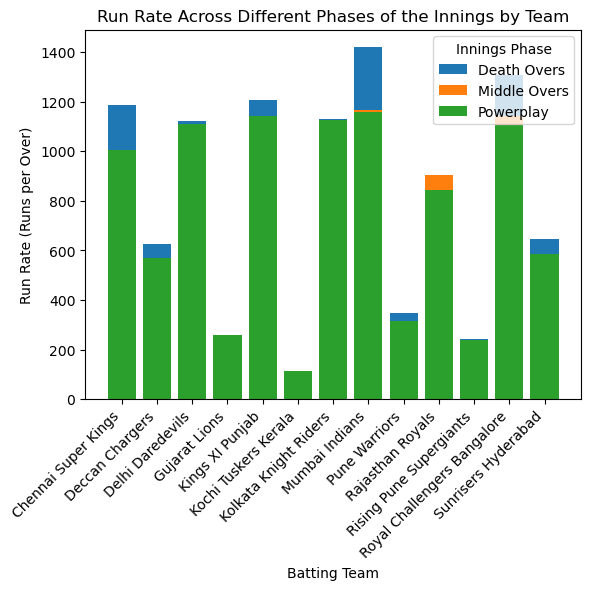

In [107]:
#visualization:
for phase in phase_data['phase'].unique():
    phase_subset = phase_data[phase_data['phase'] == phase]
    plt.bar(phase_subset['batting_team'], phase_subset['run_rate'], label=phase)
    
plt.title('Run Rate Across Different Phases of the Innings by Team')
plt.xlabel('Batting Team')
plt.ylabel('Run Rate (Runs per Over)')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Innings Phase")
plt.show()

In [110]:
#5
#Separate super overs and regular overs
super_over_df = df1[df1['is_super_over'] == 1]
regular_overs_df = df1[df1['is_super_over'] == 0]

In [111]:
#Calculate total runs and overs for super overs and regular overs
# Super Over
super_over_runs = super_over_df.groupby('batting_team')['total_runs'].sum()
super_over_overs = super_over_df.groupby('batting_team')['over'].nunique()
super_over_run_rate = super_over_runs / super_over_overs

# Regular Overs
regular_over_runs = regular_overs_df.groupby('batting_team')['total_runs'].sum()
regular_over_overs = regular_overs_df.groupby('batting_team')['over'].nunique()
regular_over_run_rate = regular_over_runs / regular_over_overs

In [112]:
# Combine into a single DataFrame for comparison
run_rate_comparison = pd.DataFrame({
    'Super Over Run Rate': super_over_run_rate,
    'Regular Over Run Rate': regular_over_run_rate
}).fillna(0)


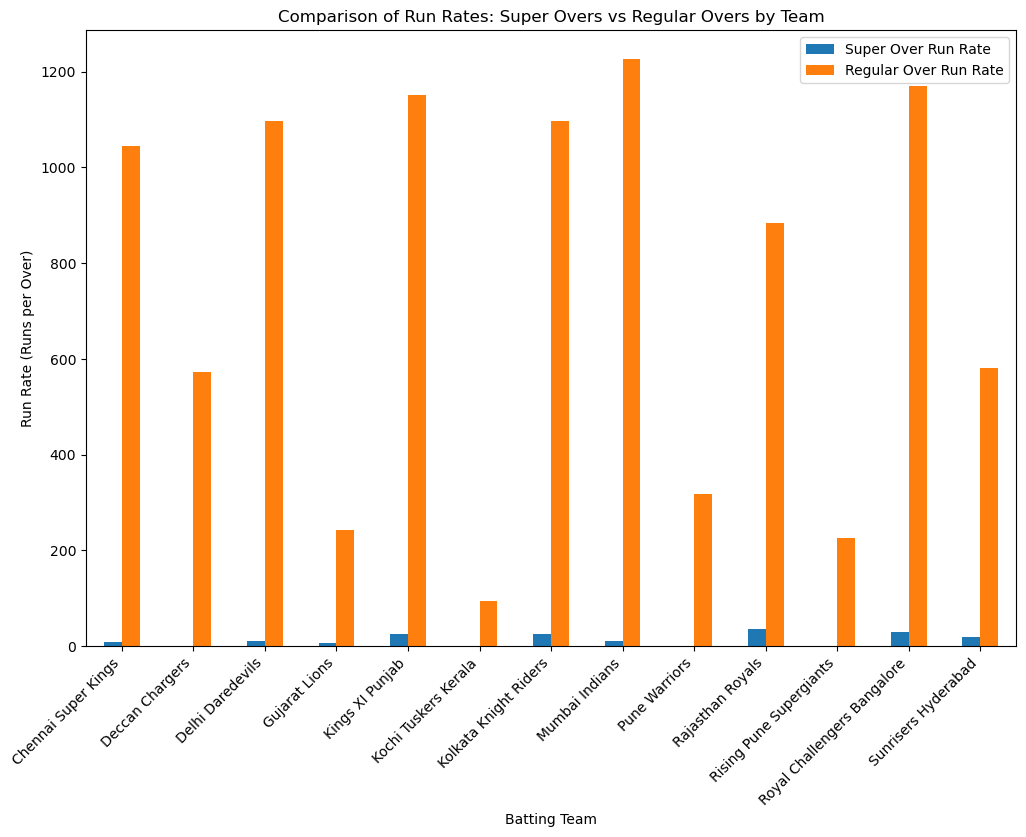

In [113]:
# Visualize the run rate comparison
run_rate_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Run Rates: Super Overs vs Regular Overs by Team')
plt.xlabel('Batting Team')
plt.ylabel('Run Rate (Runs per Over)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [243]:
#6
# Aggregate dismissal types
dismissal_counts = df3['dismissal_kind'].value_counts()

In [244]:
# Calculate the proportion of each dismissal type
total_dismissals = dismissal_counts.sum()
dismissal_proportions = (dismissal_counts / total_dismissals) * 100

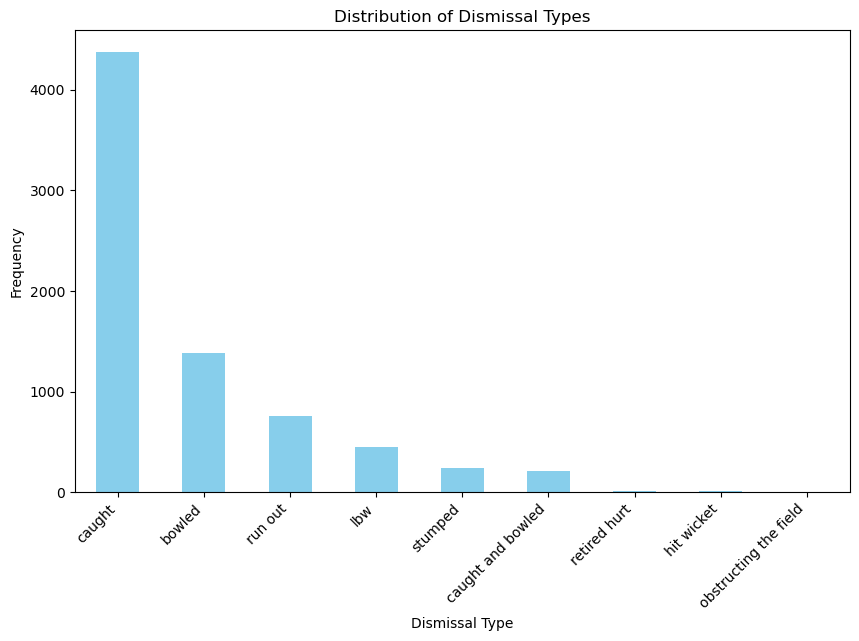

In [245]:
# Visualize the distribution of dismissal types
plt.figure(figsize=(10, 6))
dismissal_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [246]:
#7
#Calculate key bowling metrics
#Total wickets taken by each bowler
wickets_taken = df3[df3['player_dismissed'].notna()].groupby('bowler')['player_dismissed'].count()

In [247]:
# Total runs conceded by each bowler
runs_conceded = df3.groupby('bowler')['total_runs'].sum()

In [124]:
# Total balls bowled by each bowler
balls_bowled = df3.groupby('bowler').size()

In [248]:
# Convert balls bowled to overs bowled (6 balls per over)
overs_bowled = balls_bowled / 6

In [249]:
# Economy rate = total runs conceded / total overs bowled
economy_rate = runs_conceded / overs_bowled

In [250]:
# Bowling strike rate
strike_rate = balls_bowled / wickets_taken

In [251]:
# Combine the data into a single DataFrame
bowling_stats = pd.DataFrame({
    'Wickets Taken': wickets_taken,
    'Economy Rate': economy_rate,
    'Strike Rate': strike_rate
}).dropna()

In [252]:
#Analyze preferred dismissal methods
dismissal_methods = df3[df3['player_dismissed'].notna()].groupby(['bowler', 'dismissal_kind']).size().unstack(fill_value=0)


In [253]:
#Rank bowlers
top_bowlers = bowling_stats.sort_values(by='Wickets Taken', ascending=False).head(10)

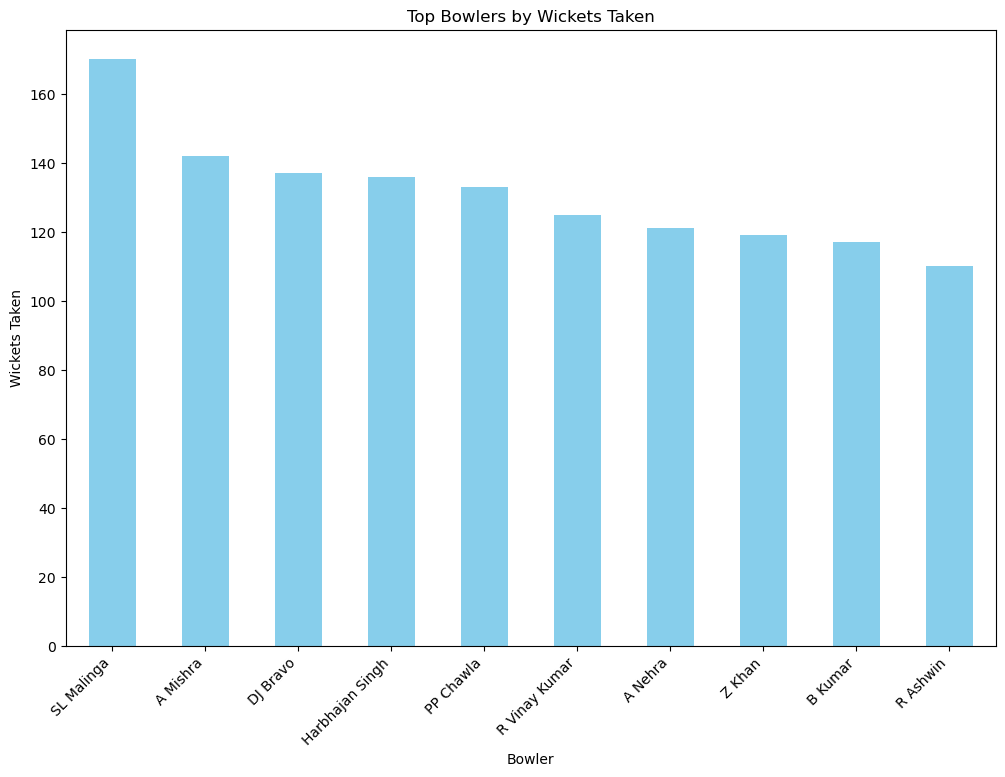

In [254]:
#Plot top bowlers' wickets taken
plt.figure(figsize=(12, 8))
top_bowlers['Wickets Taken'].plot(kind='bar', color='skyblue')
plt.title('Top Bowlers by Wickets Taken')
plt.xlabel('Bowler')
plt.ylabel('Wickets Taken')
plt.xticks(rotation=45, ha='right')
plt.show()

In [255]:
# Plot preferred dismissal methods for top bowlers
top_bowlers_list = top_bowlers.index
dismissal_methods_top_bowlers = dismissal_methods.loc[top_bowlers_list]

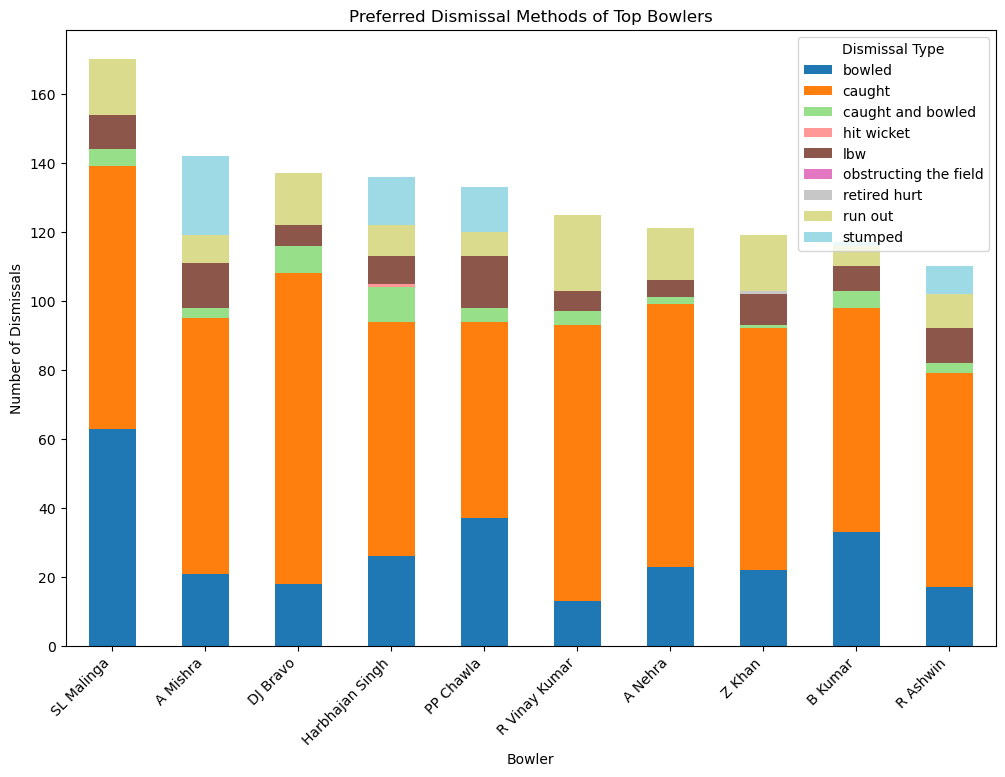

In [256]:
dismissal_methods_top_bowlers.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Preferred Dismissal Methods of Top Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Number of Dismissals')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dismissal Type')
plt.show()

In [138]:
#8
# Calculate wins for each team per season
team_wins = df.groupby(['season', 'winner']).size().reset_index(name='wins')

In [139]:
#Calculate the total number of matches played by each team per season
team_matches_as_team1 = df.groupby(['season', 'team1']).size().reset_index(name='matches_as_team1')
team_matches_as_team2 = df.groupby(['season', 'team2']).size().reset_index(name='matches_as_team2')

In [140]:
#Merge the matches data
team_matches = pd.merge(team_matches_as_team1, team_matches_as_team2, left_on=['season', 'team1'], right_on=['season', 'team2'], how='outer')
team_matches['total_matches'] = team_matches['matches_as_team1'].fillna(0) + team_matches['matches_as_team2'].fillna(0)
team_matches = team_matches[['season', 'team1', 'total_matches']].rename(columns={'team1': 'team'})

In [141]:
team_matches

,season,team,total_matches
0,2008,Chennai Super Kings,16
1,2008,Deccan Chargers,14
2,2008,Delhi Daredevils,14
3,2008,Kings XI Punjab,15
4,2008,Kolkata Knight Riders,13
...,...,...,...
79,2017,Kolkata Knight Riders,16
80,2017,Mumbai Indians,17
81,2017,Rising Pune Supergiant,16
82,2017,Royal Challengers Bangalore,13


In [142]:
#Merge wins and total matches
team_performance = pd.merge(team_wins, team_matches, left_on=['season', 'winner'], right_on=['season', 'team'], how='left')

In [143]:
team_performance

,season,winner,wins,team,total_matches
0,2008,Chennai Super Kings,9,Chennai Super Kings,16
1,2008,Deccan Chargers,2,Deccan Chargers,14
2,2008,Delhi Daredevils,7,Delhi Daredevils,14
3,2008,Kings XI Punjab,10,Kings XI Punjab,15
4,2008,Kolkata Knight Riders,6,Kolkata Knight Riders,13
...,...,...,...,...,...
79,2017,Kolkata Knight Riders,9,Kolkata Knight Riders,16
80,2017,Mumbai Indians,12,Mumbai Indians,17
81,2017,Rising Pune Supergiant,10,Rising Pune Supergiant,16
82,2017,Royal Challengers Bangalore,3,Royal Challengers Bangalore,13


In [144]:
# Calculate losses
team_performance['losses'] = team_performance['total_matches'] - team_performance['wins']


In [145]:
# Calculate win percentage
team_performance['win_percentage'] = (team_performance['wins'] / team_performance['total_matches']) * 100


In [146]:
# Pivot the table to have seasons as columns and teams as rows
win_trends = team_performance.pivot(index='team', columns='season', values='win_percentage')


In [147]:
win_trends

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
team,,,,,,,,,,
Chennai Super Kings,56.250000,57.142857,56.250000,68.750000,55.555556,66.666667,62.500000,58.823529,NaN,NaN
Deccan Chargers,14.285714,56.250000,50.000000,42.857143,26.666667,NaN,NaN,NaN,NaN,NaN
Delhi Daredevils,50.000000,66.666667,50.000000,30.769231,61.111111,18.750000,14.285714,38.461538,50.000000,42.857143
Gujarat Lions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.250000,28.571429
Kings XI Punjab,66.666667,50.000000,28.571429,50.000000,50.000000,50.000000,70.588235,21.428571,28.571429,50.000000
Kochi Tuskers Kerala,NaN,NaN,NaN,42.857143,NaN,NaN,NaN,NaN,NaN,NaN
Kolkata Knight Riders,46.153846,23.076923,50.000000,53.333333,70.588235,37.500000,68.750000,53.846154,53.333333,56.250000
Mumbai Indians,50.000000,38.461538,68.750000,62.500000,58.823529,68.421053,46.666667,62.500000,50.000000,70.588235
Pune Warriors,NaN,NaN,NaN,30.769231,25.000000,25.000000,NaN,NaN,NaN,NaN


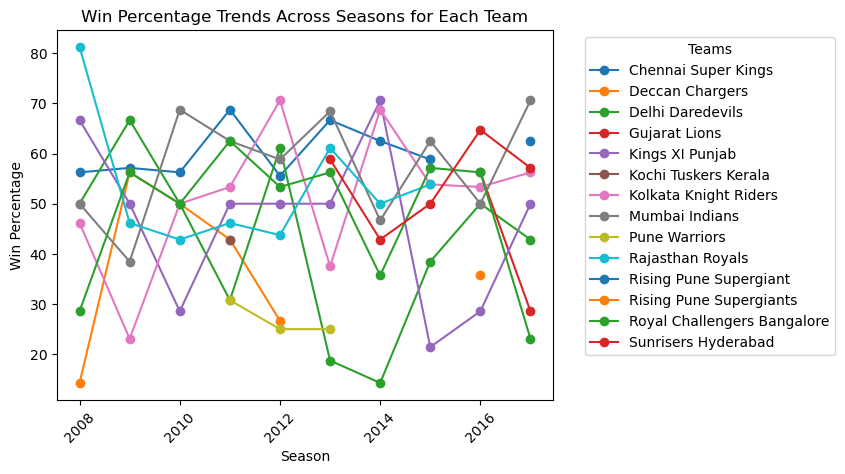

In [153]:
#visualization:
for team in win_trends.index:
    plt.plot(win_trends.columns, win_trends.loc[team], label=team, marker='o')
    
plt.title('Win Percentage Trends Across Seasons for Each Team')
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [154]:
#9
# Filter the dismissals through catches and run-outs
fielders_contribution = df1[df1['dismissal_kind'].isin(['caught', 'run out'])]

In [155]:
#Count dismissals credited to each fielder
fielder_dismissals = fielders_contribution.groupby('fielder').size().reset_index(name='dismissals').sort_values(by='dismissals', ascending=False)

In [156]:
#Display the top fielders
top_fielders = fielder_dismissals.head(10)  # Get the top 10 fielders
top_fielders

,fielder,dismissals
189,KD Karthik,101
251,MS Dhoni,96
365,SK Raina,96
17,AB de Villiers,94
337,RV Uthappa,83
320,RG Sharma,79
422,V Kohli,74
183,KA Pollard,72
271,NV Ojha,72
281,PA Patel,70


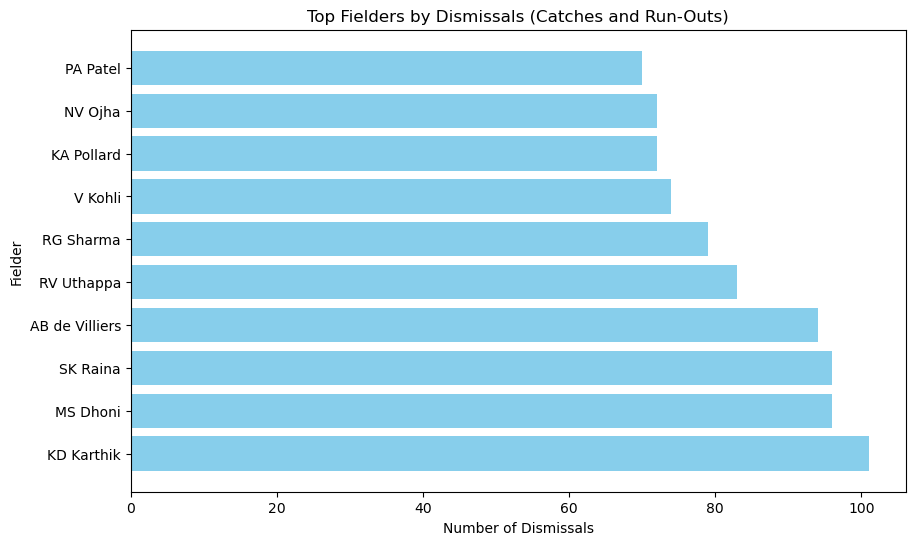

In [160]:
# visualization of top fielders:
plt.figure(figsize=(10, 6))
plt.barh(top_fielders['fielder'], top_fielders['dismissals'], color='skyblue')
plt.xlabel('Number of Dismissals')
plt.ylabel('Fielder')
plt.title('Top Fielders by Dismissals (Catches and Run-Outs)')
plt.show()

In [257]:
#Filter rows where a wicket was taken
wickets_data=wickets_data = df3.dropna(subset=['player_dismissed'])

In [258]:
#Aggregate wickets by over
wickets_per_over = wickets_data.groupby('over').size().reset_index(name='wickets')

In [259]:
wickets_per_over

,over,wickets
0,1,266
1,2,299
2,3,321
3,4,308
4,5,331
5,6,327
6,7,264
7,8,268
8,9,307
9,10,299


In [260]:
wickets_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_super_over_transformed,wide_runs_transformed,phase
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,DA Warner,caught,Mandeep Singh,0.0,0.0,Powerplay
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,S Dhawan,caught,Sachin Baby,0.0,0.0,Middle Overs
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,MC Henriques,caught,Sachin Baby,0.0,0.0,Death Overs
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,Yuvraj Singh,bowled,NA,0.0,0.0,Death Overs
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,Mandeep Singh,bowled,NA,0.0,0.0,Powerplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150422,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,AB de Villiers,caught,MC Henriques,0.0,0.0,Middle Overs
150432,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,KL Rahul,bowled,NA,0.0,0.0,Death Overs
150438,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,3,SR Watson,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,SR Watson,caught,MC Henriques,0.0,0.0,Death Overs
150448,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,1,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,1,0,1,STR Binny,run out,DJ Hooda,0.0,0.0,Death Overs


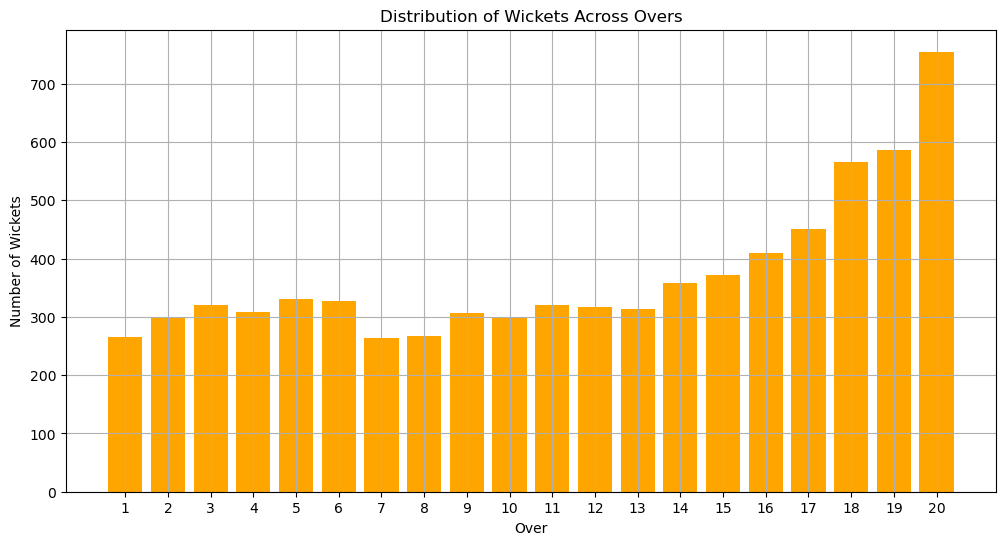

In [261]:
plt.figure(figsize=(12, 6))
plt.bar(wickets_per_over['over'], wickets_per_over['wickets'], color='orange')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.title('Distribution of Wickets Across Overs')
plt.xticks(range(1, 21))  # Assuming 20 overs format (T20 cricket)
plt.grid(True)
plt.show()

In [187]:
#Q13
#Group by Batsman and Bowler
batsman_bowler = df1.groupby(['batsman', 'bowler']).agg({
    'total_runs': 'sum',   # Total runs scored by the batsman
    'ball': 'count',       # Total balls faced by the batsman
    'player_dismissed': 'count',  # Number of times the batsman was dismissed by the bowler
    'batsman_runs': lambda x: (x == 4).sum(),  # Count of fours hit by the batsman
    'batsman_runs': lambda x: (x == 6).sum()   # Count of sixes hit by the batsman
}).reset_index()


In [188]:
#Calculate Strike Rate and Dismissal Rate
batsman_bowler['strike_rate'] = (batsman_bowler['total_runs'] / batsman_bowler['ball']) * 100  # Strike rate = (Runs / Balls faced) * 100
batsman_bowler['dismissals'] = batsman_bowler['player_dismissed']  # Rename dismissals column


In [189]:
#Find matchups where the batsman has a high strike rate (>150) or where the bowler has dismissed the batsman frequently (>=3 times)
notable_matchups = batsman_bowler[(batsman_bowler['strike_rate'] > 150) | (batsman_bowler['dismissals'] >= 3)]

In [190]:
notable_matchups

,batsman,bowler,total_runs,ball,player_dismissed,batsman_runs,strike_rate,dismissals
0,A Ashish Reddy,A Nehra,8,9,9,0,88.888889,9
1,A Ashish Reddy,AB Dinda,9,7,7,0,128.571429,7
2,A Ashish Reddy,AD Mathews,25,12,12,2,208.333333,12
3,A Ashish Reddy,AD Russell,4,3,3,0,133.333333,3
5,A Ashish Reddy,Azhar Mahmood,2,3,3,0,66.666667,3
...,...,...,...,...,...,...,...,...
17144,Z Khan,SK Warne,2,6,6,0,33.333333,6
17146,Z Khan,SR Watson,4,5,5,0,80.000000,5
17147,Z Khan,Shakib Al Hasan,3,3,3,0,100.000000,3
17148,Z Khan,Sohail Tanvir,3,5,5,0,60.000000,5


In [209]:
#14
#Group by Batsman and Dismissal Type
df3 = df1[df1['dismissal_kind'] != 'NA']
df3

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,is_super_over_transformed,wide_runs_transformed,phase
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,DA Warner,caught,Mandeep Singh,0.0,0.0,Powerplay
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,S Dhawan,caught,Sachin Baby,0.0,0.0,Middle Overs
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,MC Henriques,caught,Sachin Baby,0.0,0.0,Death Overs
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,Yuvraj Singh,bowled,NA,0.0,0.0,Death Overs
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,Mandeep Singh,bowled,NA,0.0,0.0,Powerplay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150422,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,AB de Villiers,caught,MC Henriques,0.0,0.0,Middle Overs
150432,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,KL Rahul,bowled,NA,0.0,0.0,Death Overs
150438,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,3,SR Watson,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,SR Watson,caught,MC Henriques,0.0,0.0,Death Overs
150448,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,1,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,1,0,1,STR Binny,run out,DJ Hooda,0.0,0.0,Death Overs


In [212]:
#Group by Batsman and Dismissal Type
batsman_dismissal = df3.groupby(['batsman', 'dismissal_kind']).size().reset_index(name='dismissal_count')


In [215]:
#Calculate Total Dismissals for Each Batsman
total_dismissals = df3.groupby('batsman').size().reset_index(name='total_dismissals')


In [221]:
# Merge the two dataframes to get both dismissal counts and total dismissals
dismissal_data = pd.merge(batsman_dismissal, total_dismissals, on='batsman')


In [217]:
#Calculate the Proportion of Dismissals by Type
dismissal_data['dismissal_proportion'] = dismissal_data['dismissal_count'] / dismissal_data['total_dismissals']


In [218]:
#Identify Batsmen with Higher Tendencies to Get Dismissed in Specific Ways
high_tendency_batsmen = dismissal_data[dismissal_data['dismissal_proportion'] > 0.3]
high_tendency_batsmen

,batsman,dismissal_kind,dismissal_count,total_dismissals,dismissal_proportion
0,A Ashish Reddy,bowled,5,15,0.333333
1,A Ashish Reddy,caught,8,15,0.533333
3,A Chandila,run out,1,1,1.000000
4,A Chopra,caught,2,5,0.400000
8,A Choudhary,caught,1,2,0.500000
...,...,...,...,...,...
1344,Yashpal Singh,caught,4,4,1.000000
1345,Younis Khan,bowled,1,1,1.000000
1347,Yuvraj Singh,caught,76,100,0.760000
1353,Z Khan,bowled,5,15,0.333333


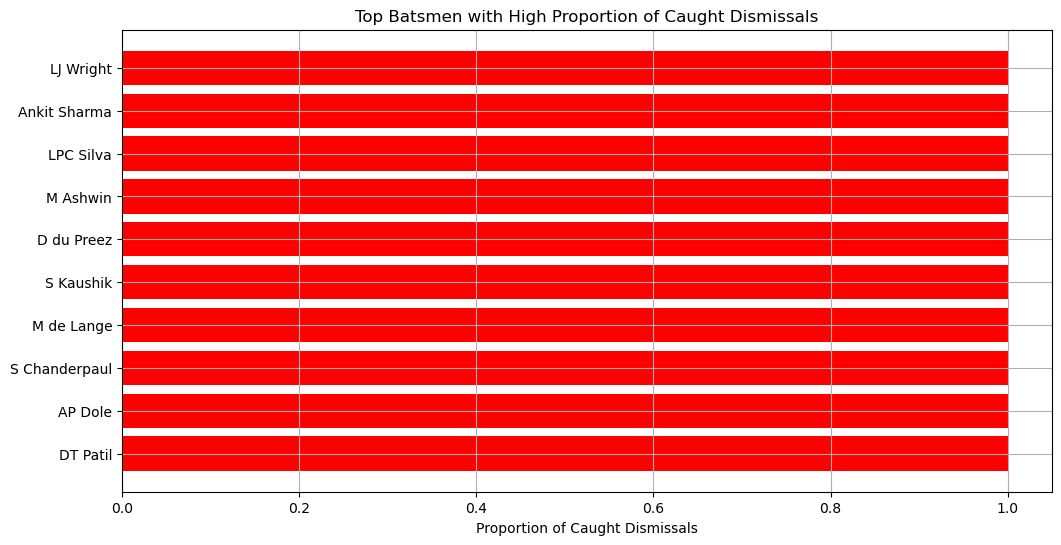

In [219]:
#visualization
#Filter data for highest dismissal type
caught_data = dismissal_data[dismissal_data['dismissal_kind'] == 'caught']

# Plotting the proportion of 'caught' dismissals for the top 10 batsmen
plt.figure(figsize=(12, 6))
caught_data = caught_data.sort_values(by='dismissal_proportion', ascending=False).head(10)
plt.barh(caught_data['batsman'], caught_data['dismissal_proportion'], color='red')
plt.xlabel('Proportion of Caught Dismissals')
plt.title('Top Batsmen with High Proportion of Caught Dismissals')
plt.grid(True)
plt.show()

In [222]:
#Q15
#Filter the data for when the specific batsman is at the crease
df_batsman = df1[(df1['batsman'] == 'DA Warner') | (df1['non_striker'] == 'DA Warner')]

In [223]:
#Calculate total runs scored by the team while the batsman is at the crease
total_runs = df_batsman['total_runs'].sum()

In [224]:
#Calculate total balls faced while the batsman is at the crease
total_balls = len(df_batsman)

In [225]:
#Convert balls to overs
total_overs = total_balls / 6

In [226]:
#Calculate run rate
run_rate = total_runs / total_overs if total_overs > 0 else 0

In [227]:
#analyze run rate by different phases
run_rate_by_phase = df_batsman.groupby('phase')['total_runs'].sum() / (df_batsman.groupby('phase').size() / 6)


In [229]:
# Display the results
print(f"Total Run Rate with {'DA Warner'} at the crease: {run_rate}")
print("Run Rate by Phase:")
print(run_rate_by_phase)

Total Run Rate with DA Warner at the crease: 8.102260495156083
Run Rate by Phase:
phase
Death Overs     10.486364
Middle Overs     7.783102
Powerplay        7.997096
dtype: float64


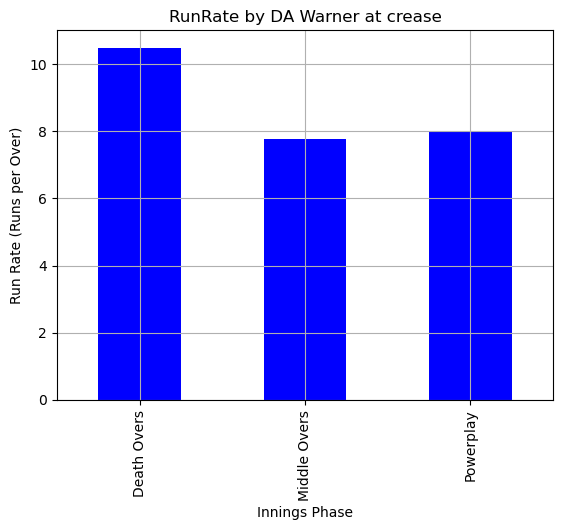

In [233]:
# Visualization
#Plotting run rate by phase for the batsman
run_rate_by_phase.plot(kind='bar', color='blue')
plt.xlabel('Innings Phase')
plt.ylabel('Run Rate (Runs per Over)')
plt.title("RunRate by DA Warner at crease")
plt.grid(True)
plt.show()

In [240]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,is_super_over_transformed,win_by_runs_transformed
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,umpire,0.0,3.583519
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,umpire,0.0,0.000000
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,umpire,0.0,0.000000
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,umpire,0.0,0.000000
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,umpire,umpire,umpire,0.0,2.772589


In [241]:
#20
#Aggregate data to calculate average win by runs per season
season_win_by_runs = df.groupby('season')['win_by_runs'].mean().reset_index()

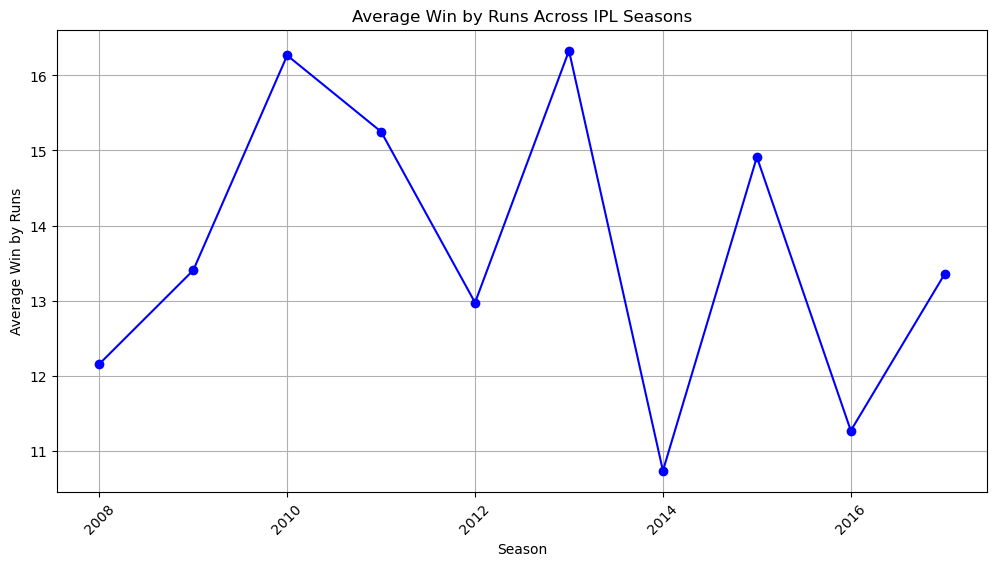

In [242]:
#Plot the average win by runs per season
plt.figure(figsize=(12, 6))
plt.plot(season_win_by_runs['season'], season_win_by_runs['win_by_runs'], marker='o', linestyle='-', color='b')
plt.xlabel('Season')
plt.ylabel('Average Win by Runs')
plt.title('Average Win by Runs Across IPL Seasons')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()